<a href="https://colab.research.google.com/github/ReipasMerenneito/ReipasMerenneito/blob/main/Practica3_Pandas_Jean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [1]:
# pandas usando el alias pd
import pandas as pd

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  7463k      0 --:--:-- --:--:-- --:--:-- 7463k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [3]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [4]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [5]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18207 non-null  int64  
 1   Name            18207 non-null  object 
 2   Nationality     18207 non-null  object 
 3   Club            17966 non-null  object 
 4   Jersey Number   18147 non-null  float64
 5   Value           18207 non-null  object 
 6   Wage            18207 non-null  object 
 7   Age             18207 non-null  int64  
 8   Height          18159 non-null  object 
 9   Weight          18159 non-null  object 
 10  Preferred Foot  18159 non-null  object 
 11  Position        18147 non-null  object 
 12  Overall         18207 non-null  int64  
 13  Potential       18207 non-null  int64  
 14  Shooting        18159 non-null  float64
 15  Defense         18159 non-null  float64
 16  Passing         18159 non-null  float64
 17  Physical        18159 non-null 

In [6]:
fifa_df.columns

Index(['ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Value', 'Wage',
       'Age', 'Height', 'Weight', 'Preferred Foot', 'Position', 'Overall',
       'Potential', 'Shooting', 'Defense', 'Passing', 'Physical', 'Control',
       'Mental', 'GoalKeeping'],
      dtype='object')

In [7]:
fifa_df.dtypes

ID                  int64
Name               object
Nationality        object
Club               object
Jersey Number     float64
Value              object
Wage               object
Age                 int64
Height             object
Weight             object
Preferred Foot     object
Position           object
Overall             int64
Potential           int64
Shooting          float64
Defense           float64
Passing           float64
Physical          float64
Control           float64
Mental            float64
GoalKeeping       float64
dtype: object

In [8]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [9]:
fifa_df.shape

(18207, 21)

In [10]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 18207
Columnas: 21


In [11]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [12]:
fifa_df.describe()
#solo para las columnas que detecta como numerico

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes. 

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [13]:
fifa_df.isna()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [15]:
fifa_df.dropna()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,England,Crewe Alexandra,22.0,€60K,€1K,19,5'9,134lbs,...,CM,47,65,36.0,44.0,43.0,56.0,54.0,49.0,9.0
18203,243165,N. Christoffersson,Sweden,Trelleborgs FF,21.0,€60K,€1K,19,6'3,170lbs,...,ST,47,63,40.0,24.0,30.0,47.0,44.0,38.0,9.0
18204,241638,B. Worman,England,Cambridge United,33.0,€60K,€1K,16,5'8,148lbs,...,ST,47,67,42.0,24.0,30.0,56.0,49.0,44.0,8.0
18205,246268,D. Walker-Rice,England,Tranmere Rovers,34.0,€60K,€1K,17,5'10,154lbs,...,RW,47,66,43.0,28.0,39.0,53.0,58.0,38.0,10.0


In [16]:
t_df = fifa_df.dropna()

Verifica que no hay más datos faltantes:

In [17]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [19]:
#ya se depuraron los datos faltantes
fifa_df = t_df

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis. 

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones). 

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [20]:
fifa_df.Wage.str[-1]

0        K
1        K
2        K
3        K
4        K
        ..
18202    K
18203    K
18204    K
18205    K
18206    K
Name: Wage, Length: 17918, dtype: object

In [21]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [22]:
fifa_df.Value.str[-1]

0        M
1        M
2        M
3        M
4        M
        ..
18202    K
18203    K
18204    K
18205    K
18206    K
Name: Value, Length: 17918, dtype: object

In [23]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [24]:
def currency_to_numeric(currency):
  """
  La funcion recibe valores monetarios en un objeto de texto, los tranforma:
  1- Elimina el simbolo de la moneda al inicio de la cadena
  2- Extrae el caracter adicional al final de la cadena que indica el
     multiplo de la cantidad (abreviatura). No siempre hay un simbolo.
  3- Usa el valor para devolver la cantidad en numero (multiplica por el valor).
  Ej: 250K pasa a 250000
  ya que
  1K = 1000
  1M = 1000000
  Sin letra solo parte numerica
  """
  # el multiplo de K o M
  symbols = {"K": 1000, "M": 1000000}
  # Actualiza el valor de numeric con la cantidad en currency
  numeric = 0.0

  val=currency[-1]
  val1=currency[1:]

  if val in symbols:
    numeric = float(val1[:-1])*symbols[val]
  else:
    numeric = float(val1)
  
  return numeric

Prueba tu función:

In [25]:
currency_to_numeric("$20M")

20000000.0

In [26]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [27]:
#usamos applymap() para aplicar un mismo metodo a todas las entradas de una columna/matriz
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador. 


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [28]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   6892      0 --:--:-- --:--:-- --:--:--  6831


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [29]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [30]:
fifa_df.columns

Index(['ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Value', 'Wage',
       'Age', 'Height', 'Weight', 'Preferred Foot', 'Position', 'Overall',
       'Potential', 'Shooting', 'Defense', 'Passing', 'Physical', 'Control',
       'Mental', 'GoalKeeping'],
      dtype='object')

In [31]:
fifa_df["Position"].value_counts()

ST     2130
GK     1992
CB     1754
CM     1377
LB     1305
RB     1268
RM     1114
LM     1086
CAM     948
CDM     936
RCB     652
LCB     637
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [32]:
merged_df = fifa_df.merge(positions_df,how="inner", left_on="Position", right_on="Abbreviation")

In [33]:
merged_df

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,RF,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,RF,Right Forward
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,RF,Right Forward
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,RF,Right Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,232267,Lu Yao,China PR,Henan Jianye FC,27.0,110000.0,2000.0,25,5'9,172lbs,...,59,36.0,51.0,52.0,71.0,63.0,43.0,11.0,LWB,Left Wing Back
17914,243608,R. Giles,England,Wolverhampton Wanderers,23.0,170000.0,3000.0,18,5'10,159lbs,...,76,48.0,46.0,55.0,67.0,66.0,51.0,8.0,LWB,Left Wing Back
17915,233931,K. Rowles,Australia,Central Coast Mariners,15.0,180000.0,1000.0,20,6'0,181lbs,...,71,30.0,49.0,34.0,67.0,43.0,38.0,10.0,LWB,Left Wing Back
17916,244864,F. Fridriksson,Iceland,Vejle Boldklub,2.0,130000.0,1000.0,19,5'9,154lbs,...,70,32.0,53.0,41.0,65.0,59.0,44.0,11.0,LWB,Left Wing Back


In [34]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [35]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] +")"

Muestra la columna actualizada:

In [36]:
merged_df["Position"].head(3)

0    Right Forward (RF)
1    Right Forward (RF)
2    Right Forward (RF)
Name: Position, dtype: object

Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [37]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [38]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0


In [39]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [40]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,Right Forward (RF),78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,Right Forward (RF),75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [41]:
fifa_df.sort_values("Value",ascending=False).head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
2146,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4512,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [42]:
fifa_df.sort_values("Wage",ascending=False).head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4914,176580,L. Suárez,Uruguay,FC Barcelona,9.0,80000000.0,455000.0,31,6'0,190lbs,...,Right Side (RS),91,91,86.0,56.0,74.0,81.0,87.0,87.0,31.0
4513,177003,L. Modrić,Croatia,Real Madrid,10.0,67000000.0,420000.0,32,5'8,146lbs,...,Right Center Midfield (RCM),91,91,76.0,74.0,89.0,79.0,92.0,89.0,10.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [43]:
fifa_df[["Potential", "Overall"]].describe()

,Potential,Overall
count,17918.000000,17918.000000
mean,71.329334,66.236801
std,6.144098,6.929243
min,48.000000,46.000000
25%,67.000000,62.000000
50%,71.000000,66.000000
75%,75.000000,71.000000
max,95.000000,94.000000


In [44]:
fifa_df["Potential left"] = fifa_df["Potential"]-fifa_df['Overall']
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,0


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [45]:
fifa_df['Age'].describe()

count    17918.000000
mean        25.105257
std          4.675372
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [46]:
fifa_df[fifa_df['Age']<22]

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
8,231628,Rafa Mir,Spain,UD Las Palmas,9.0,3100000.0,27000.0,21,6'3,190lbs,...,70,81,65.0,45.0,59.0,69.0,65.0,63.0,11.0,11
31,230666,Gabriel Jesus,Brazil,Manchester City,33.0,41000000.0,130000.0,21,5'9,161lbs,...,83,92,74.0,43.0,69.0,83.0,87.0,82.0,10.0,9
48,239207,M. Gómez,Uruguay,RC Celta,18.0,20500000.0,25000.0,21,6'1,185lbs,...,80,85,73.0,36.0,63.0,64.0,69.0,67.0,9.0,5
61,231943,Richarlison,Brazil,Everton,30.0,18000000.0,79000.0,21,5'11,154lbs,...,79,86,71.0,48.0,68.0,79.0,79.0,76.0,10.0,7
62,231478,L. Martínez,Argentina,Inter,18.0,18000000.0,54000.0,20,5'9,174lbs,...,79,86,67.0,41.0,56.0,79.0,76.0,75.0,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,241884,D. Sugioka,Japan,Shonan Bellmare,29.0,190000.0,1000.0,19,6'0,165lbs,...,58,70,36.0,53.0,48.0,64.0,56.0,45.0,10.0,12
17914,243608,R. Giles,England,Wolverhampton Wanderers,23.0,170000.0,3000.0,18,5'10,159lbs,...,56,76,48.0,46.0,55.0,67.0,66.0,51.0,8.0,20
17915,233931,K. Rowles,Australia,Central Coast Mariners,15.0,180000.0,1000.0,20,6'0,181lbs,...,56,71,30.0,49.0,34.0,67.0,43.0,38.0,10.0,15
17916,244864,F. Fridriksson,Iceland,Vejle Boldklub,2.0,130000.0,1000.0,19,5'9,154lbs,...,54,70,32.0,53.0,41.0,65.0,59.0,44.0,11.0,16


In [47]:
fifa_df[fifa_df['Age']<22].sort_values(by=["Potential", "Potential left","Overall"], ascending=True).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
16380,241657,D. Horton,England,Lincoln City,33.0,40000.0,1000.0,18,6'1,179lbs,...,48,55,36.0,47.0,46.0,60.0,50.0,44.0,12.0,7
10017,233945,Wu Wei,China PR,Tianjin Quanjian FC,2.0,60000.0,2000.0,21,6'1,176lbs,...,52,56,41.0,52.0,44.0,68.0,53.0,50.0,9.0,4
4502,225510,D. Mackay,Scotland,Kilmarnock,13.0,30000.0,1000.0,21,6'3,179lbs,...,49,56,20.0,17.0,21.0,43.0,29.0,31.0,48.0,7
2119,225468,M. Bloomfield,England,Hamilton Academical FC,16.0,50000.0,3000.0,21,5'11,165lbs,...,51,57,44.0,21.0,35.0,61.0,54.0,48.0,13.0,6
16325,245401,Lee Dong Hee,Korea Republic,Jeju United FC,42.0,50000.0,1000.0,21,5'11,159lbs,...,51,57,36.0,39.0,51.0,57.0,56.0,54.0,9.0,6


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [48]:
fifa_df['Defense'].idxmax(axis=0)

7910

In [49]:
idx = fifa_df["Defense"].idxmax(axis=0)
fifa_df[["Name", "Club", "Defense", "Position"]].iloc[idx]

Name                               N. Kanté
Club                                Chelsea
Defense                                86.0
Position    Left Defensive Midfielder (LDM)
Name: 7910, dtype: object

### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [50]:
fifa_df['Preferred Foot'].value_counts()

Right    13756
Left      4162
Name: Preferred Foot, dtype: int64

In [51]:
rightf = fifa_df[fifa_df['Preferred Foot']=="Right"]
leftf = fifa_df[fifa_df['Preferred Foot']=="Left"]

rightfcount=rightf["Preferred Foot"].size
leftfcount=leftf["Preferred Foot"].size

print(rightfcount)
print(leftfcount)

13756
4162


In [52]:
print("El porcentaje de jugadores diestros es", 100*rightfcount/fifa_df['Preferred Foot'].size, '%')
print("El porcentaje de jugadores zurdos es", 100*leftfcount/fifa_df['Preferred Foot'].size, '%')

El porcentaje de jugadores diestros es 76.77196115637906 %
El porcentaje de jugadores zurdos es 23.22803884362094 %


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [79]:
fifa_df
fifa_df.groupby(["Club","Overall"]).agg(["max"])


ID          Name Nationality Jersey Number  \
                                 max           max         max           max   
Club                 Overall                                                   
 SSV Jahn Regensburg 52       240218  A. Weidinger     Germany          32.0   
                     58       228510     H. Hyseni     Germany          34.0   
                     61       239494       S. Kopp     Germany          20.0   
                     63       240027    A. Vrenezi      Kosovo          24.0   
                     64       244280   M. Palionis     Morocco          29.0   
...                              ...           ...         ...           ...   
Śląsk Wrocław        66       244231  M. Cholewiak      Serbia          32.0   
                     67       209471    M. Chrapek    Portugal           6.0   
                     68       200087      A. Piech      Poland          29.0   
                     69       222163       R. Pich    Slovakia          16.0   
                     70       176211      M. Robak      Poland           9.0   

                                  Value    Wage Age Height  Weight  \
                                    max     max max    max     max   
Club                 Overall                                         
 SSV Jahn Regensburg 52         60000.0  1000.0  21    6'6  194lbs   
                     58        160000.0  2000.0  25    6'4  194lbs   
                     61        425000.0  3000.0  23    6'6  194lbs   
                     63        500000.0  2000.0  24    6'2  172lbs   
                     64        950000.0  6000.0  31    6'4  203lbs   
...                                 ...     ...  ..    ...     ...   
Śląsk Wrocław        66        775000.0  3000.0  33    6'3  187lbs   
                     67        800000.0  3000.0  30    5'9  176lbs   
                     68        575000.0  4000.0  33    5'7  159lbs   
                     69       1000000.0  4000.0  33    5'9  168lbs   
                     70        825000.0  4000.0  35    6'0  172lbs   

                             Preferred Foot                         Position  \
                                        max                              max   
Club                 Overall                                                   
 SSV Jahn Regensburg 52               Right                  Goalkeeper (GK)   
                     58               Right                     Striker (ST)   
                     61               Right            Central Midfield (CM)   
                     63               Right                     Striker (ST)   
                     64               Right                     Striker (ST)   
...                                     ...                              ...   
Śląsk Wrocław        66               Right            Right Midfielder (RM)   
                     67               Right  Left Defensive Midfielder (LDM)   
                     68               Right                  Right Side (RS)   
                     69               Right          Right Center Back (RCB)   
                     70               Right                   Left Side (LS)   

                             Potential Shooting Defense Passing Physical  \
                                   max      max     max     max      max   
Club                 Overall                                               
 SSV Jahn Regensburg 52             60     11.0    11.0    20.0     35.0   
                     58             61     49.0    31.0    36.0     58.0   
                     61             72     46.0    54.0    62.0     58.0   
                     63             69     53.0    53.0    53.0     70.0   
                     64             79     58.0    57.0    65.0     61.0   
...                                ...      ...     ...     ...      ...   
Śląsk Wrocław        66             67     60.0    64.0    64.0     71.0   
                     67             67     54.0    

### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [90]:
#la columna "Value" de los clubs muestra el valor total del club, es decir, la suma de los valores de los jugadores en cada club
fifa_df.groupby("Club")["Value"].sum().reset_index().sort_values(by="Value", ascending=False)

,Club,Value
470,Real Madrid,874425000.0
212,FC Barcelona,852600000.0
374,Manchester City,786555000.0
326,Juventus,704475000.0
214,FC Bayern München,679025000.0
...,...,...
543,Sligo Rovers,3295000.0
83,Bohemian FC,3195000.0
188,Derry City,2795000.0
361,Limerick FC,2040000.0


### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [100]:


players_mx_df = fifa_df[fifa_df["Nationality"]=="Mexico"]
players_mx_df.head(10)


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
77,178224,J. Hernández,Mexico,West Ham United,17.0,12000000.0,90000.0,30,5'9,161lbs,...,79,79,71.0,37.0,62.0,72.0,76.0,77.0,12.0,0
250,192930,A. Pulido,Mexico,Guadalajara,9.0,6500000.0,35000.0,27,5'10,168lbs,...,74,75,68.0,40.0,63.0,75.0,70.0,68.0,11.0,1
391,224151,H. Martín,Mexico,Club América,21.0,4000000.0,41000.0,25,5'10,161lbs,...,72,75,66.0,40.0,64.0,75.0,73.0,69.0,10.0,3
412,214727,A. Zaldívar,Mexico,Guadalajara,14.0,4200000.0,25000.0,24,5'10,168lbs,...,72,77,67.0,47.0,61.0,74.0,69.0,59.0,10.0,5
461,217710,M. Barragán,Mexico,Club Necaxa,9.0,2800000.0,10000.0,26,5'10,168lbs,...,71,72,67.0,37.0,59.0,74.0,67.0,60.0,8.0,1
568,199569,E. Torres,Mexico,Club Tijuana,19.0,2300000.0,12000.0,25,6'0,179lbs,...,70,73,71.0,39.0,65.0,72.0,68.0,69.0,10.0,3
723,203283,A. Escoto,Mexico,Deportivo Toluca,11.0,1100000.0,10000.0,25,5'11,154lbs,...,68,71,54.0,34.0,61.0,66.0,65.0,62.0,13.0,3
741,204849,M. Bueno,Mexico,CD Everton de Viña del Mar,11.0,1300000.0,11000.0,24,6'0,159lbs,...,68,75,59.0,40.0,60.0,72.0,64.0,60.0,12.0,7
763,187238,D. Jiménez,Mexico,Lobos BUAP,9.0,900000.0,4000.0,29,5'8,137lbs,...,68,68,61.0,34.0,60.0,71.0,75.0,54.0,13.0,0
811,184777,E. Herrera,Mexico,Santos Laguna,11.0,900000.0,22000.0,29,6'2,190lbs,...,68,68,65.0,39.0,57.0,57.0,53.0,66.0,11.0,0


Agrupa por el nombre del club y cuenta:

In [124]:
players_mx_df.groupby("Club")["Value"].sum().reset_index().sort_values(by="Value", ascending=False)


,Club,Value
17,Guadalajara,61835000.0
23,Monterrey,42025000.0
38,Tigres U.A.N.L.,40230000.0
15,FC Porto,39000000.0
24,PSV,37000000.0
5,Club América,28980000.0
25,Pachuca,28370000.0
10,Cruz Azul,26385000.0
34,Santos Laguna,25755000.0
29,Real Betis,19000000.0


## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

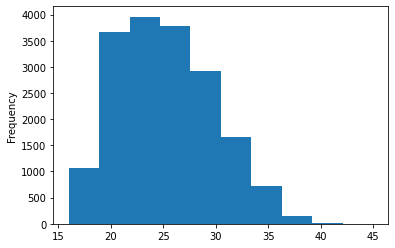

In [125]:
fifa_df["Age"].plot.hist(bins=10)

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

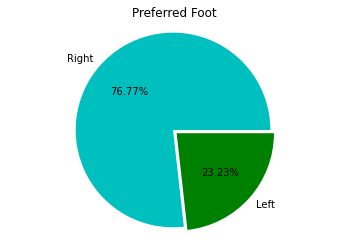

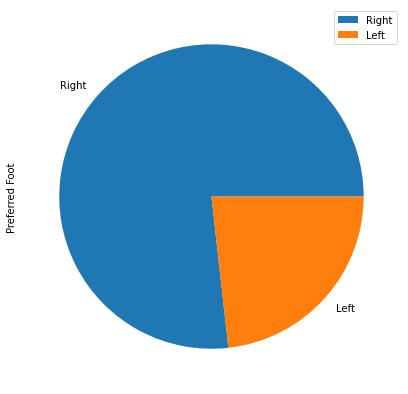

In [165]:
#rightf = fifa_df[fifa_df['Preferred Foot']=="Right"]
#leftf = fifa_df[fifa_df['Preferred Foot']=="Left"]
#rightfcount=rightf["Preferred Foot"].size
#leftfcount=leftf["Preferred Foot"].size
import matplotlib.pyplot as plt

labels = 'Right', 'Left',
sections = [rightfcount,leftfcount]
colors = ['c', 'g']

plt.pie(sections, labels=labels, colors=colors, explode= (0,0.05), autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Preferred Foot')
plt.show()

footpie_df=pd.DataFrame({'Preferred Foot' : [rightfcount,leftfcount]}, index=['Right', 'Left'])
footpie_df.plot.pie(y='Preferred Foot', figsize=(7,7))

### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

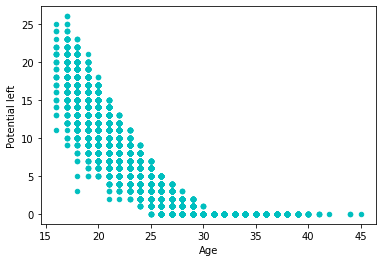

In [172]:
#df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1], [6.4, 3.2, 1], [5.9, 3.0, 2]], columns=['length', 'width', 'species'])
#df.plot.scatter(x='length', y='width', c='species', colormap='viridis')

fifa_df.plot.scatter(x='Age', y= 'Potential left', color='c')

¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano. 

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades? 

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```